<a href="https://colab.research.google.com/github/ericgbraz/COLAB_PED/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import io
import gzip

dataframes = []

urls = ["https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2020.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2021.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time_2022.csv.gz",
        "https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz"
       ]

print(type(urls))

for url in urls:
  response = requests.get(url)
  content  = response.content
  compressed_file = io.BytesIO(content)
  uncompressed_file = gzip.GzipFile(fileobj=compressed_file)
  df = pd.read_csv(uncompressed_file)
  dataframes.append(df)

df_total = pd.concat(dataframes)



<class 'list'>


In [3]:
#https://colab.research.google.com/drive/1H1N387IIAGV-3YRtyxzPz94vSiLrhE0M?usp=sharing
#df_total[df_total.city=='São Paulo/SP']
df_total


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,9,2020-02-25,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000
1,9,2020-02-25,TOTAL,TOTAL,0,0,0,1,1,0.000,0.000,0.000
2,9,2020-02-26,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
3,9,2020-02-26,TOTAL,TOTAL,0,0,0,0,1,0.000,0.000,0.000
4,9,2020-02-27,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
430964,311,2023-03-18,PR,Ângulo/PR,4101150,0,11,0,967,375.299,32992.153,0.011
430965,311,2023-03-18,BA,Érico Cardoso/BA,2900504,0,53,13,2467,504.138,23466.185,0.021
430966,311,2023-03-18,PA,Óbidos/PA,1505106,0,166,25,8717,316.353,16612.353,0.019
430967,311,2023-03-18,SP,Óleo/SP,3533809,0,6,0,162,245.198,6620.351,0.037


In [123]:
df_final = df_total.query('state != "TOTAL" & (newDeaths >= 0 | newCases >=0)').sort_values('date',ascending=True)

df_final["date"] = pd.to_datetime(df_final["date"])
df_final['ano_mes'] = df_final['date'].dt.to_period('M').apply(lambda r: r.to_timestamp().strftime('%Y-%m'))
df_final['dia'] = df_final['date'].dt.day
df_final['mes'] = df_final['date'].dt.month
df_final['ano'] = df_final['date'].dt.year
df_final

#print("Número de registros:", len(df_final))
#estado_counts = df_final['state'].value_counts()
#print("Distribuição dos casos por estado:")
#print(estado_counts)
#total_casos = df_final['newCases'].sum()
#total_obitos = df_final['newDeaths'].sum()
#print("Total de casos confirmados:", total_casos)
#print("Total de óbitos:", total_obitos)

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,ano_mes,dia,mes,ano
0,9,2020-02-25,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000,2020-02,25,2,2020
2,9,2020-02-26,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,26,2,2020
4,9,2020-02-27,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,27,2,2020
6,9,2020-02-28,SP,São Paulo/SP,3550308,0,0,1,2,0.000,0.016,0.000,2020-02,28,2,2020
8,9,2020-02-29,SP,São Paulo/SP,3550308,0,0,0,2,0.000,0.016,0.000,2020-02,29,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427244,311,2023-03-18,PE,Garanhuns/PE,2606002,1,345,28,33323,244.080,23575.315,0.010,2023-03,18,3,2023
427243,311,2023-03-18,BA,Gandu/BA,2911204,0,65,0,4068,198.304,12410.763,0.016,2023-03,18,3,2023
427242,311,2023-03-18,MG,Gameleiras/MG,3127339,0,4,0,644,78.678,12667.191,0.006,2023-03,18,3,2023
427250,311,2023-03-18,SC,Garuva/SC,4205803,0,41,6,3896,217.900,20705.782,0.011,2023-03,18,3,2023


In [17]:
import matplotlib.pyplot as plt



In [81]:
df_sp = df_total.query('city == "São Paulo/SP" & (newDeaths >= 0 | newCases >=0)').sort_values('date',ascending=True)
df_sp["date"] = pd.to_datetime(df_sp["date"])
df_sp['ano_mes'] = df_sp['date'].dt.to_period('M').apply(lambda r: r.to_timestamp().strftime('%Y-%m'))
df_sp['ano'] = df_sp['date'].dt.year
df_sp

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,ano_mes,ano
0,9,2020-02-25,SP,São Paulo/SP,3550308,0,0,1,1,0.000,0.008,0.000,2020-02,2020
2,9,2020-02-26,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,2020
4,9,2020-02-27,SP,São Paulo/SP,3550308,0,0,0,1,0.000,0.008,0.000,2020-02,2020
6,9,2020-02-28,SP,São Paulo/SP,3550308,0,0,1,2,0.000,0.016,0.000,2020-02,2020
8,9,2020-02-29,SP,São Paulo/SP,3550308,0,0,0,2,0.000,0.016,0.000,2020-02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408002,311,2023-03-14,SP,São Paulo/SP,3550308,0,44646,0,1153678,360.154,9306.578,0.039,2023-03,2023
413599,311,2023-03-15,SP,São Paulo/SP,3550308,0,44646,0,1153678,360.154,9306.578,0.039,2023-03,2023
419196,311,2023-03-16,SP,São Paulo/SP,3550308,0,44646,0,1153678,360.154,9306.578,0.039,2023-03,2023
424793,311,2023-03-17,SP,São Paulo/SP,3550308,0,44646,0,1153678,360.154,9306.578,0.039,2023-03,2023


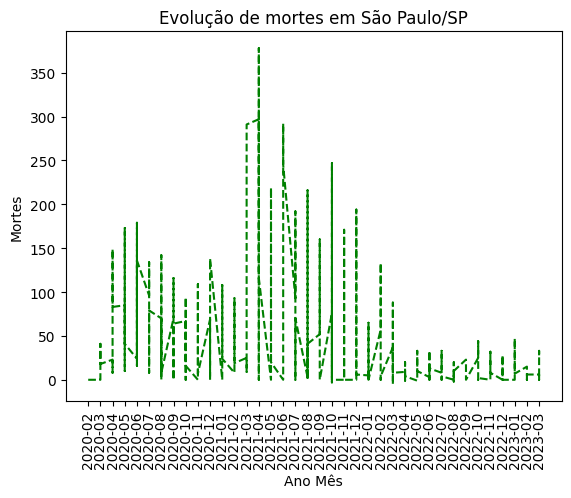

In [150]:
plt.plot(df_sp['ano_mes'], df_sp['newDeaths'], color='green', linestyle='dashed')
plt.title(f"Evolução de mortes em São Paulo/SP")
plt.xlabel("Ano Mês")
plt.ylabel("Mortes")
plt.xticks(rotation=90)
plt.show()



<ipython-input-76-8f50e3a1c949>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


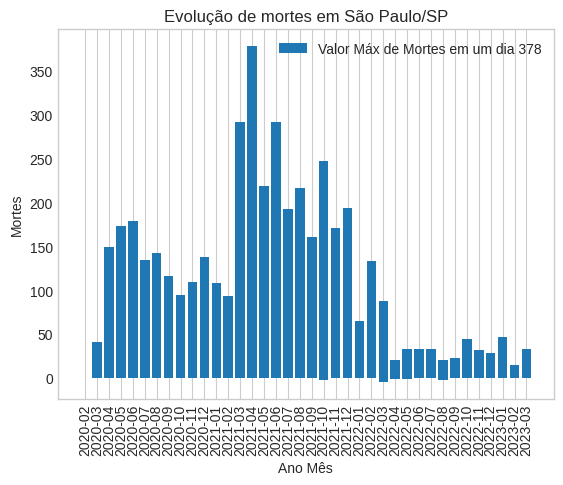

In [76]:
plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
plt.bar(df_sp['ano_mes'], df_sp['newDeaths'], label= 'Valor Máx de Mortes em um dia '+str(df_sp['newDeaths'].max()))
plt.title(f"Evolução de mortes em São Paulo/SP")
plt.xlabel("Ano Mês")
plt.ylabel("Mortes")
plt.xticks(rotation=90)
#plt.show()
plt.grid(axis='y')
plt.legend();


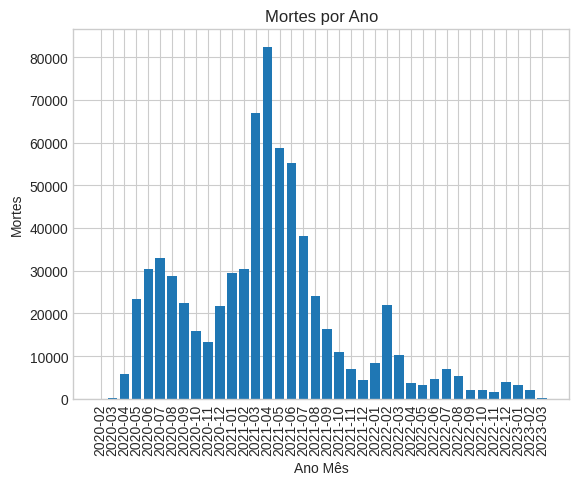

In [94]:
df_brasil = df_total.query('state == "TOTAL" & (newDeaths >= 0 | newCases >=0)').sort_values('date',ascending=True)
df_brasil["date"] = pd.to_datetime(df_brasil["date"])
df_brasil['ano_mes'] = df_brasil['date'].dt.to_period('M').apply(lambda r: r.to_timestamp().strftime('%Y-%m'))
df_brasil['ano'] = df_brasil['date'].dt.year
df_brasil

mortes_por_ano = df_brasil.groupby('ano_mes')['newDeaths'].sum()

plt.bar(mortes_por_ano.index, mortes_por_ano.values)

# Configurar os rótulos e títulos
plt.xlabel('Ano Mês')
plt.ylabel('Mortes')
plt.title('Mortes por Ano')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()

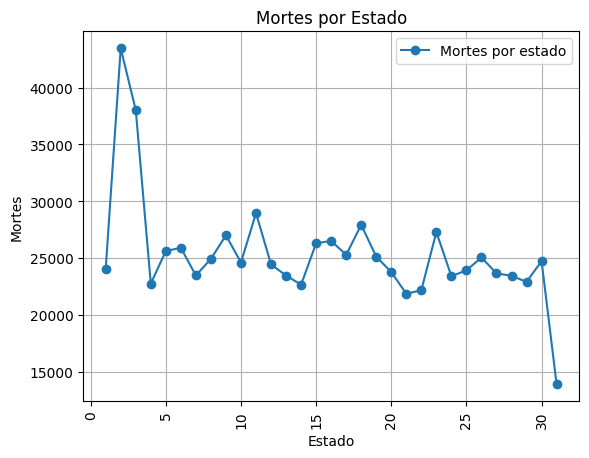

In [125]:
plt.rcdefaults()
#mortes_por_estado = df_final[df_final['state'] == 'SP'].groupby('state')['newDeaths'].sum()
#casos_por_estado = df_final[df_final['state'] == 'SP'].groupby('state')['newCases'].sum()

mortes_por_estado = df_final.groupby('dia')['newDeaths'].sum()

plt.plot(mortes_por_estado.index, mortes_por_estado.values,label = "Mortes por estado", marker = 'o')

# Configurar os rótulos e títulos
plt.xlabel('Estado')
plt.ylabel('Mortes')
plt.title('Mortes por Estado')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.grid()
#plt.xticks([]) # Oculta rótulo x
plt.legend();

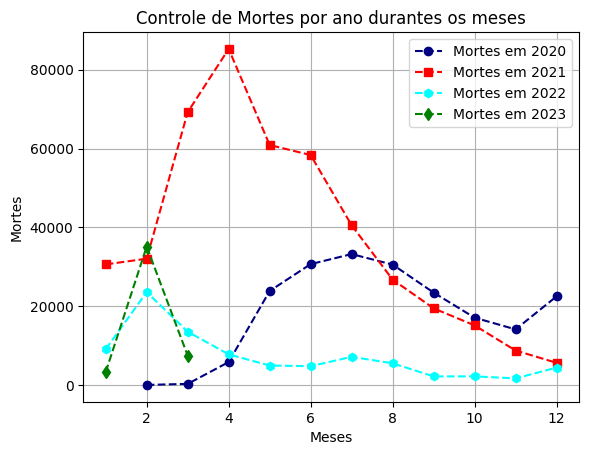

In [143]:
plt.rcdefaults()

mortes_por_mes_2020 = df_final[df_final['ano'] == 2020].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2021 = df_final[df_final['ano'] == 2021].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2022 = df_final[df_final['ano'] == 2022].groupby('mes')['newDeaths'].sum()
mortes_por_mes_2023 = df_final[df_final['ano'] == 2023].groupby('mes')['newDeaths'].sum()

x_periodo = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

plt.plot(mortes_por_mes_2020.index, mortes_por_mes_2020.values, label = "Mortes em 2020", marker = 'o',linestyle='dashed', color ='navy')
plt.plot(mortes_por_mes_2021.index, mortes_por_mes_2021.values, label = "Mortes em 2021", marker = 's',linestyle='dashed', color ='red')
plt.plot(mortes_por_mes_2022.index, mortes_por_mes_2022.values, label = "Mortes em 2022", marker = 'h',linestyle='dashed', color ='cyan')
plt.plot(mortes_por_mes_2023.index, mortes_por_mes_2023.values, label = "Mortes em 2023", marker = 'd',linestyle='dashed', color ='green')

plt.title("Controle de Mortes por ano durantes os meses")
plt.ylabel("Mortes")
plt.xlabel("Meses")
plt.grid()
plt.legend();

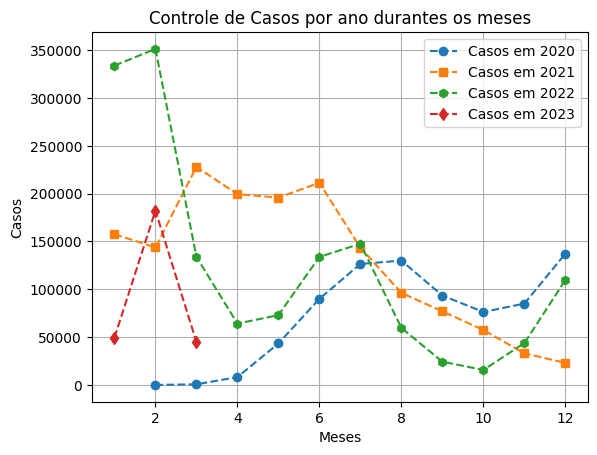

In [149]:
plt.rcdefaults()

casos_por_mes_2020 = df_final[df_final['ano'] == 2020].groupby('mes')['newCases'].sum()/10
casos_por_mes_2021 = df_final[df_final['ano'] == 2021].groupby('mes')['newCases'].sum()/10
casos_por_mes_2022 = df_final[df_final['ano'] == 2022].groupby('mes')['newCases'].sum()/10
casos_por_mes_2023 = df_final[df_final['ano'] == 2023].groupby('mes')['newCases'].sum()/10

x_periodo = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

plt.plot(casos_por_mes_2020.index, casos_por_mes_2020.values, label = "Casos em 2020", marker = 'o',linestyle='dashed')
plt.plot(casos_por_mes_2021.index, casos_por_mes_2021.values, label = "Casos em 2021", marker = 's',linestyle='dashed')
plt.plot(casos_por_mes_2022.index, casos_por_mes_2022.values, label = "Casos em 2022", marker = 'h',linestyle='dashed')
plt.plot(casos_por_mes_2023.index, casos_por_mes_2023.values, label = "Casos em 2023", marker = 'd',linestyle='dashed')

plt.title("Controle de Casos por ano durantes os meses")
plt.ylabel("Casos")
plt.xlabel("Meses")
plt.grid()
plt.legend();